## Classify and count sea lions from image

In [25]:
INPUT_DIR = '../../input/kaggle-sea-lion/'
OUTPUT_DIR = '../../output/kaggle-sea-lion/04/'
MODEL_FILE='../../output/kaggle-sea-lion/03-ok/tf-checkpoint-best9615'

IMAGE_DIMS = (148,148,3)

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import sklearn
import os
import glob

from modules.logging import logger
import modules.utils as utils
from modules.utils import Timer
import modules.logging
import modules.cnn as cnn

Using TensorFlow backend.


## Initialize cnn classifier

### Prepare output dir

In [7]:
utils.mkdirs(OUTPUT_DIR, recreate=True)
modules.logging.setup_file_logger(OUTPUT_DIR + 'out.log')
logger.info('Dir ' + OUTPUT_DIR + ' created')

2017-03-27 10:58:58,438 INFO Dir ../../output/lung-cancer/03/ created


In [ ]:
#from MismatchedTrainImages.txt
MISMATCHED = [3, 7, 9, 21, 30, 34, 71, 81, 89, 97, 151, 184, 215, 234, 242, 268, 290, 311, 331, 344, 380, 384, 406, 421, 469, 475, 490, 499, 507, 530, 531, 605, 607, 614, 621, 638, 644, 687, 712, 721, 767, 779, 781, 794, 800, 811, 839, 840, 869, 882, 901, 903, 905, 909, 913, 927, 946]
logger.info('loading train.csv')
train = pd.read_csv(INPUT_DIR + "Train/train.csv")

### Prepare CNN model

In [8]:
logger.info('Prepare CNN for training')
network = cnn.net_alexnet_lion(IMAGE_DIMS)
model = cnn.prepare_cnn_model(network, OUTPUT_DIR, model_file=MODEL_FILE)

2017-03-27 10:59:01,501 INFO Prepare CNN for training
2017-03-27 10:59:01,581 INFO CNN model already loaded. Reusing it.


## Look for sea lions present in images

### Perform a sliding window search

In [ ]:
found_classes = 
#for each
t = Timer('predicting sea-lion convnet')
y_result = model.predict(X[0])
t.stop()

Training Step: 6  | total loss: 3.00226 | time: 87.080s
| Adam | epoch: 001 | loss: 3.00226 - acc: 0.6251 -- iter: 0576/6616


## Verify classification/count performance

In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage.data
import selectivesearch
import modules.utils as utils

INPUT_DIR = '../../input/kaggle-sea-lion/'
img_file = INPUT_DIR + 'Train/0.jpg'
print(img_file)
im0 = cv2.imread(img_file)

r = 600.0 / im0.shape[1]
dim = (600, int(im0.shape[0] * r))
im = cv2.resize(im0, dim, interpolation = cv2.INTER_AREA)

Using TensorFlow backend.


../../input/kaggle-sea-lion/Train/0.jpg


In [ ]:
import numpy as np

print('searching')
img_lbl, regions = selectivesearch.selective_search(im, scale=5, sigma=0.9, min_size=2)

print('showing')
regions2 = []
for a in regions:
    size = a['size']
    r = a['rect']
    w = r[0]-r[2]
    h = r[1]-r[3]
    if(2<size<14):
        print(size)
        regions2 = regions2 + [r]
#    if(3<w<30 and 3<h<30):
#        print(w)
#        regions2 = regions2 + [r]

regions3 = []
for a in regions:
    size = a['size']
    r = a['rect']
    regions3 = regions3 + [r]
        


searching


KeyboardInterrupt: 

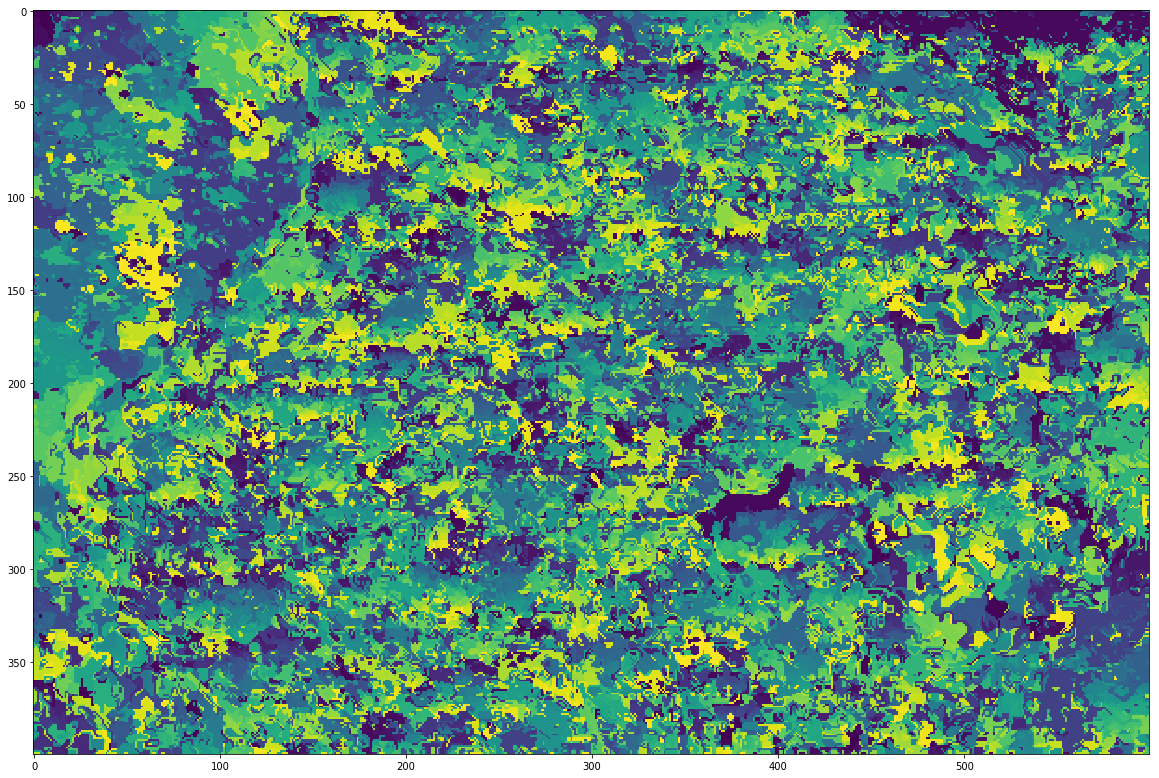

In [15]:
import skimage
regions = skimage.segmentation.felzenszwalb(im, scale=5, sigma=0.9, min_size=2)
utils.show_image(regions, size=20)

3701


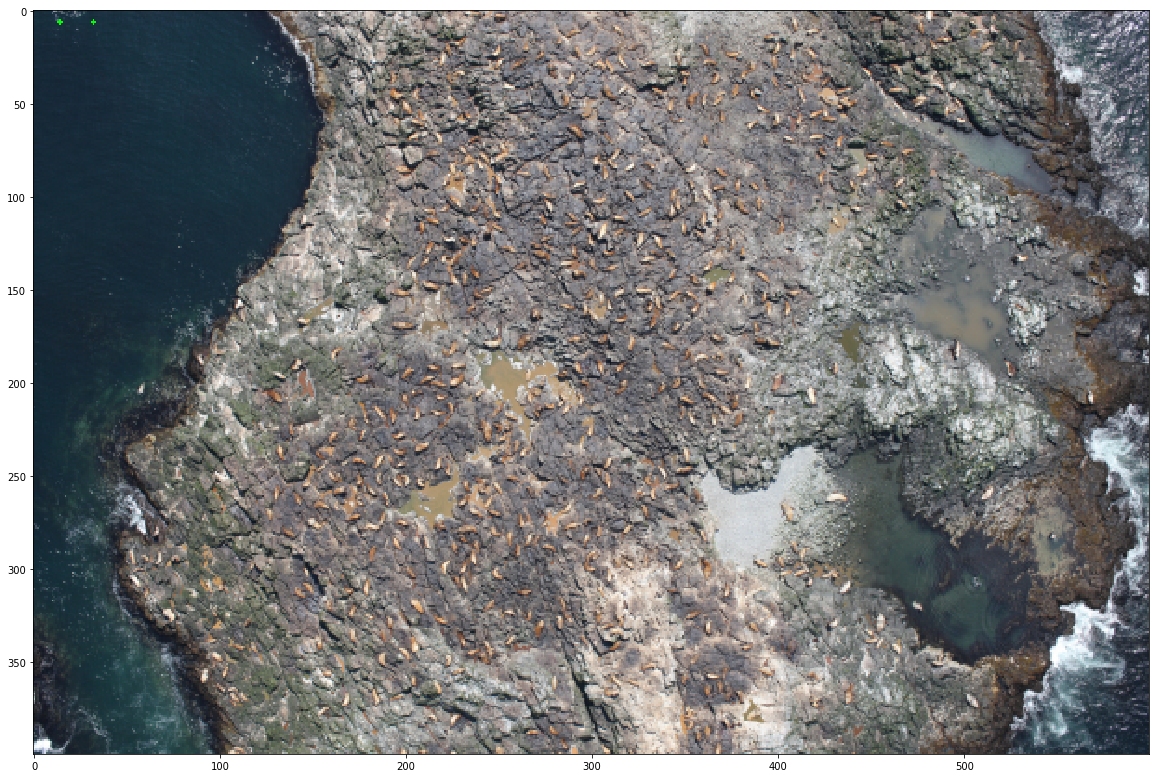

In [4]:
im2 = im.copy()
print(len(regions3))
for r in regions:
    w = r[0]-r[2]
    h = r[1]-r[3]
    if(3<w<50 and 3<h<50):
        cv2.rectangle(im2, (r[0], r[2]), (r[1], r[3]), (0,255,0), 2)
    
utils.show_image(im2, is_bgr=True, size=20)